In [213]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [214]:
#Read whale returns and create Dataframe and identify # of rows/columns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_returns.shape

(1060, 4)

In [215]:
#Drop nulls and sort ascending dates
clean_whale_returns = whale_returns.sort_index(axis=0, ascending = True).dropna()
clean_whale_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [216]:
#Confirm zero 'Nulls'
clean_whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [217]:
# Read algo returns create Dataframe and identify # of rows/columns 
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_returns.shape

(1241, 2)

In [218]:
# Drop nulls and sort ascending dates
clean_algo_returns = algo_returns.sort_index(axis=0, ascending=True).dropna()
clean_algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [219]:
#Confirm zero nulls
clean_algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [220]:
#Read S&P 500 read Dataframe and identify # of rows and columns
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history.shape

(1649, 1)

In [221]:
#Check datatypes
sp500_history.dtypes

Close    object
dtype: object

In [222]:
#Fix datatypes, remove '$' and change to float
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history["Close"].dtype

dtype('float64')

In [223]:
#Check if '$' is removed and close is a 'float'
sp500_history["Close"].head(5)

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [224]:
#Calculate Daily Returns and Drop nulls
sp500_daily_returns = sp500_history.pct_change().sort_index(axis=0, ascending = True).dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [225]:
#Check for '0' nulls
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [226]:
#Rename column S&P 500
clean_sp500_daily_returns = sp500_daily_returns.rename(columns = {"Close" : "S&P 500"})
clean_sp500_daily_returns.head()

,S&P 500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


In [227]:
#Concatenate all Dataframes into a single Dataframe
all_returns = pd.concat([clean_whale_returns,clean_algo_returns,clean_sp500_daily_returns], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


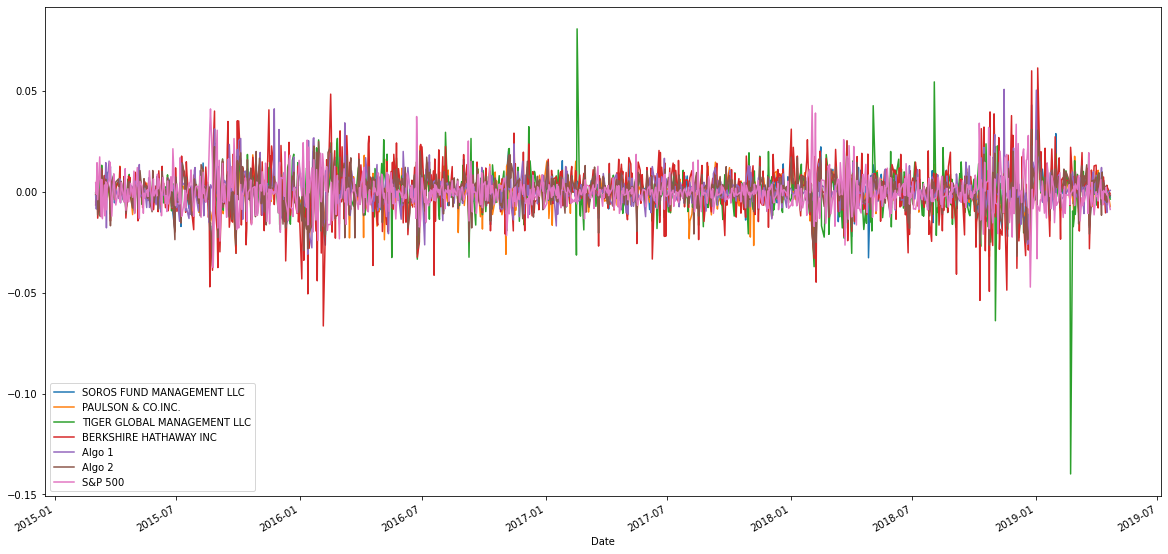

In [228]:
#Plot Daily Returns
all_returns.plot(figsize=(20,10))

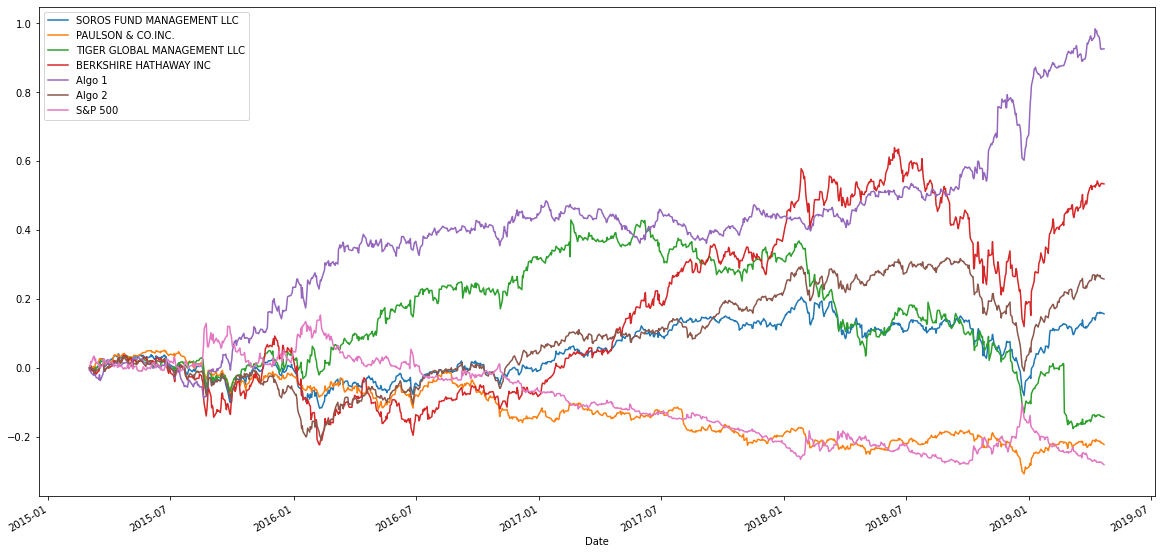

In [229]:
#Plot Cumulative Returns
cumulative_returns = (1 + all_returns).cumprod() -1
cumulative_returns.plot(figsize=(20,10))

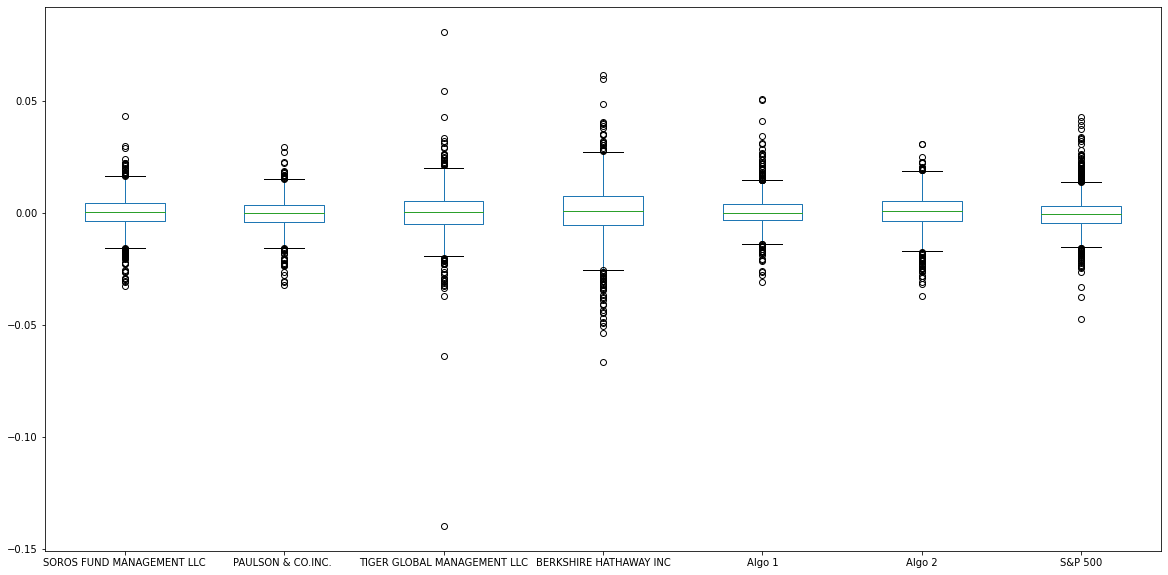

In [230]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,10))

In [231]:
#Calculate the std dev. for each portfolio
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


In [232]:
#Determine which portfolios are riskier than the S&P 500
risky_stocks = daily_std[daily_std > daily_std["S&P 500"]]
print(risky_stocks)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [233]:
#Calculate annualized std dev. (252 trading days)
std_annual = daily_std * np.sqrt(252)
print(std_annual)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


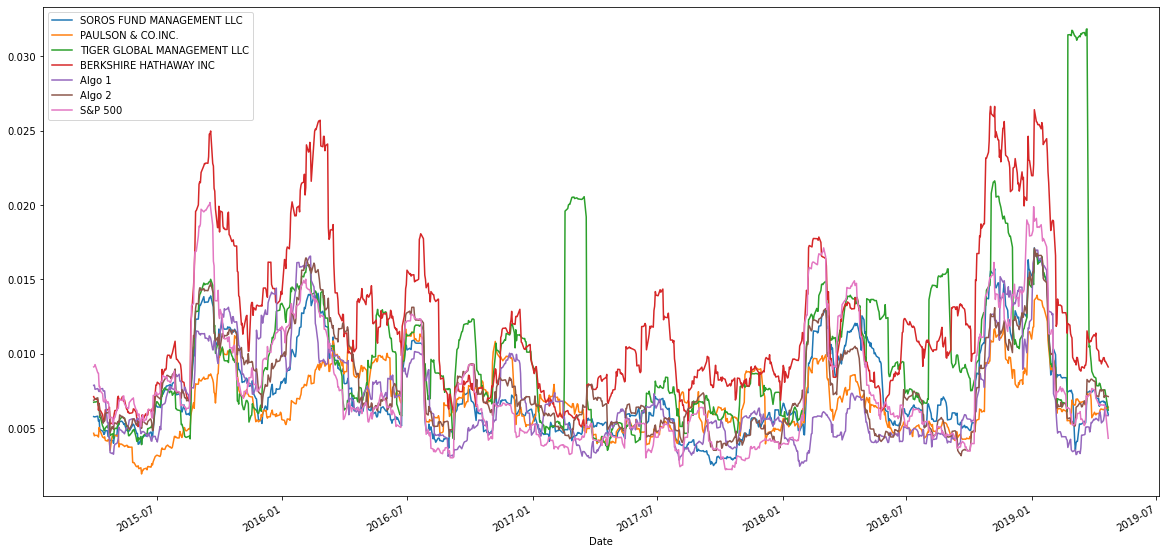

In [234]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
all_returns.rolling(window=21).std().plot(figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


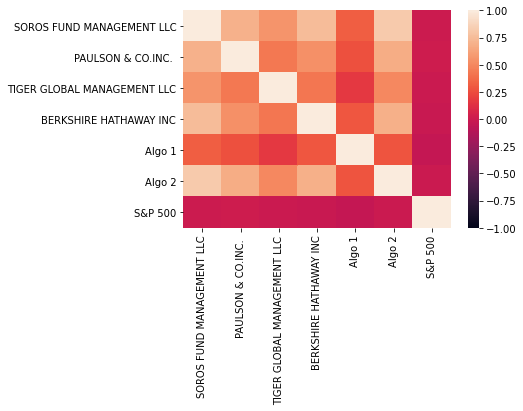

In [235]:
#Construct correlation table
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

In [236]:
#Calculate Beta for a single portfolio compared to the total market(S&P 500)
covariance = all_returns["Algo 2"].cov(all_returns["S&P 500"])
variance = all_returns["S&P 500"].var()
algo2_beta = (covariance / variance)
print(f"Algo 2 Beta: {algo2_beta}")

Algo 2 Beta: -0.002129237736587276


In [237]:
# Calculate a rolling window using the exponentially weighted moving average. 

In [238]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratio.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

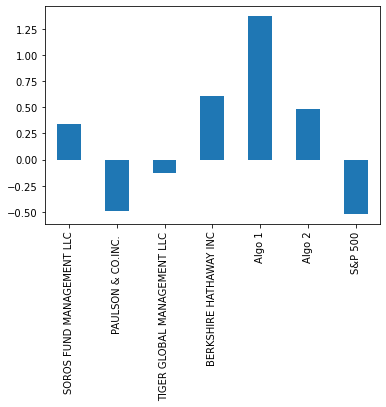

In [239]:
#Visualize the Sharpe Ratio as a bar plot
sharpe_ratio.plot.bar()

In [240]:
# Read the first stock
# YOUR CODE HERE

cost_data = Path("Resources/cost_historical.csv")
cost = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [241]:
# Read the second stock
# YOUR CODE HERE

goog_data = Path("Resources/goog_historical.csv")
goog = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [242]:
# Read the third stock
# YOUR CODE HERE

aapl_data = Path("Resources/aapl_historical.csv")
aapl = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [243]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

# Create a new pivot table where the columns are the closing prices for each ticker
portfolio_df = pd.concat([cost, goog, aapl], axis="columns", join="inner")
portfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [244]:
#Drop 'Symbol' add ticker symbol to columns
portfolio_df.drop(columns=['Symbol'], inplace=True)
portfolio_df.columns=['COST','GOOG','AAPL']
portfolio_df.head()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-09,243.47,1162.38,200.72
2019-05-08,241.34,1166.27,202.90
2019-05-07,240.18,1174.10,202.86
2019-05-06,244.23,1189.39,208.48
2019-05-03,244.62,1185.40,211.75


In [245]:
# Reset the index
# YOUR CODE HERE
portfolio_df = portfolio_df.reset_index()
portfolio_df

,Trade DATE,COST,GOOG,AAPL
0,2019-05-09,243.47,1162.38,200.72
1,2019-05-08,241.34,1166.27,202.90
2,2019-05-07,240.18,1174.10,202.86
3,2019-05-06,244.23,1189.39,208.48
4,2019-05-03,244.62,1185.40,211.75
...,...,...,...,...
245,2018-05-17,199.60,1078.59,186.99
246,2018-05-16,198.71,1081.77,188.18
247,2018-05-15,195.48,1079.23,186.44
248,2018-05-14,195.88,1100.20,188.15


In [246]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

portfolio_df = portfolio_df.pivot_table(index="Trade DATE")
portfolio_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [247]:
# Drop Nulls
# YOUR CODE HERE

portfolio_df = portfolio_df.dropna()
portfolio_df.isnull().sum()

AAPL    0
COST    0
GOOG    0
dtype: int64

In [248]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
daily_returns = portfolio_df.pct_change()
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [249]:
weights = [0.33, 0.33, 0.33]
weighted_returns = daily_returns.dot(weights)
weighted_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.009963
2018-05-16    0.009309
2018-05-17   -0.001579
dtype: float64

In [250]:
# Join Portfolio returns to the df that contains all portfolio returns

combined_df = pd.concat([all_returns, daily_returns], axis="columns", join ="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN,NaN,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940


In [251]:
#Drop nulls
combined_df = combined_df.dropna()
combined_df.isnull().sum()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.003637,-0.003206,-0.011339


In [252]:
#Risk 
#Find std dev of combined dataframe
combined_std = combined_df.std()
combined_std.head(10)

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
S&P 500                        0.009605
AAPL                           0.018724
COST                           0.013376
GOOG                           0.016111
dtype: float64

In [253]:
#sort std dev. to find order of risk
combined_std_sort = combined_std.sort_values(ascending=False)
combined_std_sort.head(10)

AAPL                           0.018724
GOOG                           0.016111
BERKSHIRE HATHAWAY INC         0.015579
TIGER GLOBAL MANAGEMENT LLC    0.014671
COST                           0.013376
S&P 500                        0.009605
SOROS FUND MANAGEMENT LLC      0.009248
Algo 2                         0.008788
Algo 1                         0.008437
PAULSON & CO.INC.              0.007366
dtype: float64

In [254]:
#annualize the riskiness
combined_std_annual = combined_std * np.sqrt(252)
combined_std_annual.head(10)

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
AAPL                           0.297235
COST                           0.212330
GOOG                           0.255747
dtype: float64

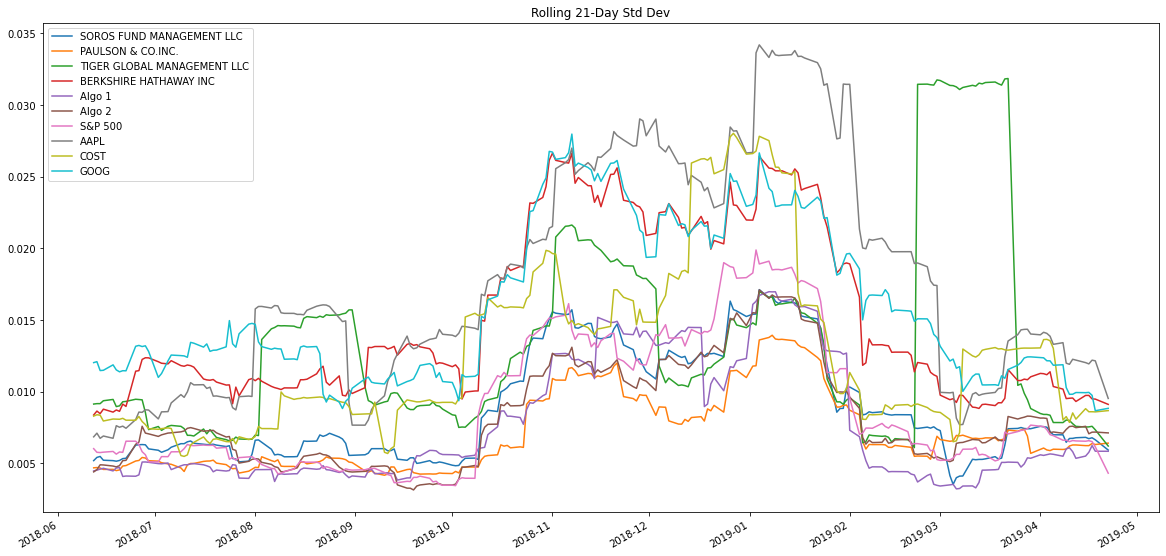

In [255]:
#Rolling
rolling_combined_std = combined_df.rolling(window=21).std()
rolling_combined_std = rolling_combined_std.plot(figsize=(20,10), title="Rolling 21-Day Std Dev")

In [256]:
#Beta
#Find variance for combined portfolio vs. S&P 500.
#Find covariance for all stocks then find beta for all stocks
variance = combined_df["S&P 500"].var()
print(variance)

9.224865900102118e-05


In [257]:
cov_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df["S&P 500"])
cov_soros

-2.509830175772124e-06

In [258]:
beta_soros = cov_soros / variance
beta_soros

-0.027207226673553492

In [259]:
cov_paulson = combined_df['PAULSON & CO.INC. '].cov(combined_df["S&P 500"])
cov_paulson

-4.234986149485071e-06

In [260]:
beta_paulson = cov_paulson / variance
beta_paulson

-0.04590837628803027

In [261]:
cov_tiger = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['S&P 500'])
cov_tiger

8.286348277021429e-07

In [262]:
beta_tiger = cov_tiger / variance
beta_tiger

0.008982621933755916

In [263]:
cov_berkshire = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P 500'])
cov_berkshire

-5.810344392942294e-06

In [264]:
beta_berkshire = cov_berkshire / variance
beta_berkshire

-0.06298567866312262

In [265]:
cov_algo1 = combined_df['Algo 1'].cov(combined_df['S&P 500'])
cov_algo1

-4.414381768479611e-06

In [266]:
beta_algo1 = cov_algo1 / variance
beta_algo1

-0.04785307251383182

In [267]:
cov_algo2 = combined_df['Algo 2'].cov(combined_df['S&P 500'])
cov_algo2

-3.5904901069126607e-06

In [268]:
beta_algo2 = cov_algo2 / variance
beta_algo2

-0.03892186776257544

In [269]:
cov_aapl = combined_df['AAPL'].cov(combined_df['S&P 500'])
cov_aapl

1.6255522913973335e-05

In [270]:
beta_appl = cov_aapl / variance
beta_appl

0.17621419205447084

In [271]:
cov_cost = combined_df['COST'].cov(combined_df['S&P 500'])
cov_cost

-8.980350049636708e-06

In [272]:
beta_cost = cov_cost / variance
beta_cost

-0.09734938314428285

In [273]:
cov_goog = combined_df['GOOG'].cov(combined_df['S&P 500'])
cov_goog

-5.1227409611092096e-06

In [274]:
beta_goog = cov_goog / variance
beta_goog

-0.05553187457231765

In [275]:
#Annualized Sharpe Ratios (using 'mean' and 'std' functions)
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
AAPL                           0.440644
COST                           1.203329
GOOG                           0.663844
dtype: float64

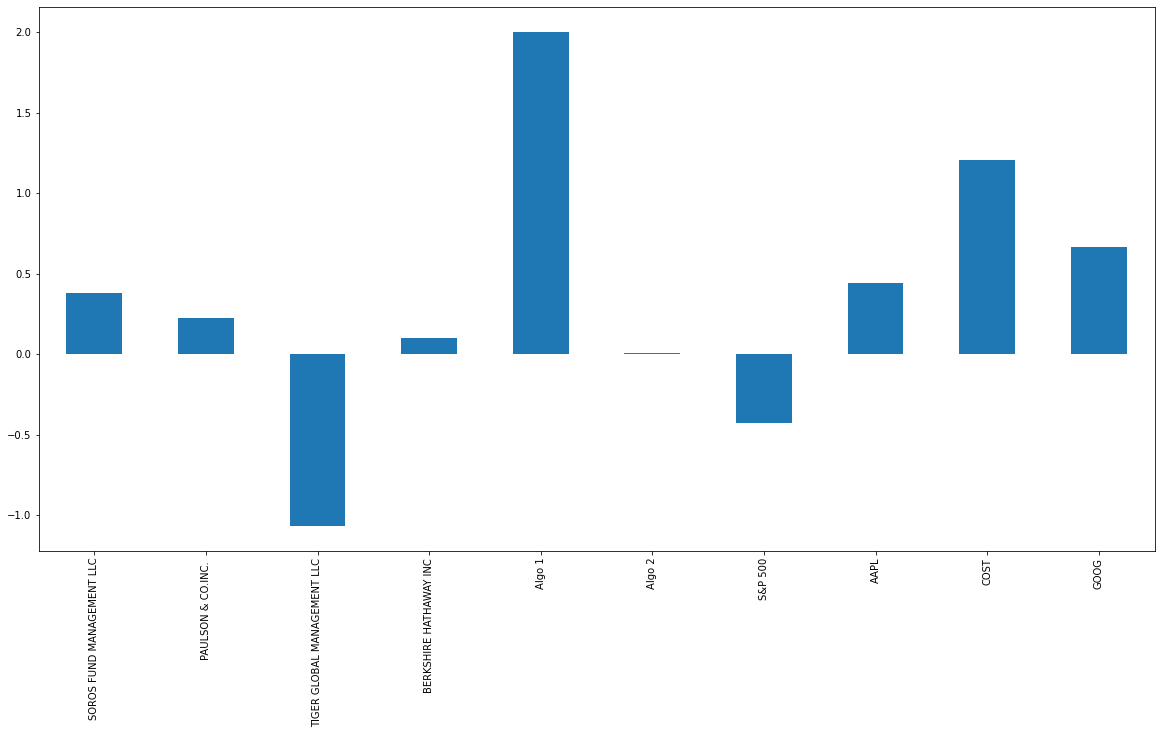

In [276]:
#Visualize sharpe ratio as bar plot
sharpe_ratio.plot(kind="bar", figsize=(20,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.608203,0.517303,0.682174
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.544385,0.496253,0.553574
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.333839,0.352421,0.289959
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.693263,0.430821,0.823946
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.223292,0.138534,0.271730
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.638438,0.495357,0.681320
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.090390,-0.069904,-0.033106
AAPL,0.608203,0.544385,0.333839,0.693263,0.223292,0.638438,0.090390,1.000000,0.432894,0.691782
COST,0.517303,0.496253,0.352421,0.430821,0.138534,0.495357,-0.069904,0.432894,1.000000,0.409008
GOOG,0.682174,0.553574,0.289959,0.823946,0.271730,0.681320,-0.033106,0.691782,0.409008,1.000000


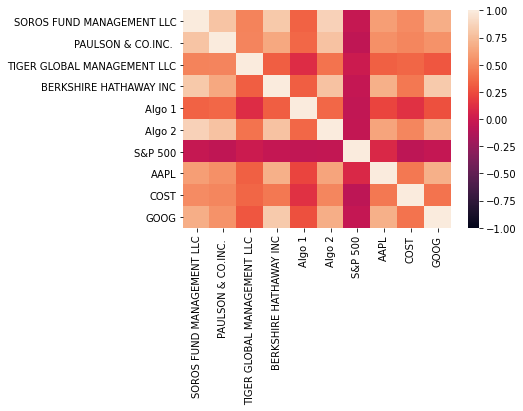

In [277]:
#Correlation analysis
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation